In [ ]:
# Kết nối colab và google drive
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# Tạo thư mục chứa mô hình
!mkdir "/content/gdrive/My Drive/Custom_Dataset_Yolo"

# Chuyển vào thư mục làm việc để thao tác
%cd "/content/gdrive/My Drive/Custom_Dataset_Yolo"

/content/gdrive/My Drive/Custom_Dataset_Yolo


In [ ]:
# Clone mô hình darknet về thư mục làm việc
!git clone https://github.com/phamdinhkhanh/darknetGoogleColab.git

Cloning into 'darknetGoogleColab'...
remote: Enumerating objects: 1241, done.
remote: Counting objects: 100% (1241/1241), done.
remote: Compressing objects: 100% (978/978), done.
remote: Total 1241 (delta 278), reused 1206 (delta 254), pack-reused 0
Receiving objects: 100% (1241/1241), 7.77 MiB | 6.46 MiB/s, done.
Resolving deltas: 100% (278/278), done.
Checking out files: 100% (2035/2035), done.


In [7]:
# Chuyển thư mục đến darknetGoogleColab 
%cd darknetGoogleColab/

# Phân quyền execution cho file darknet
!chmod +x ./darknet

In [ ]:
# Tải dữ liệu để huấn luyện mô hình
!curl 'https://storage.googleapis.com/kaggle-data-sets/513560%2F1057373%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1596023297&Signature=HtS2e1MYzb5THvB%2Bfkxk0yXc8oxlkWve0yb6C1MQbSTZRYA930ZGthkjms6RHqnzmkNKT4g2v9HpMoeVgLFvxQJ0LPXxifnT8CJhA4sl1uWIT%2FIwpisTTWmYHSMjuR65IYpXFI7kWuXncjSGICcthSMwckpYuysow0l8kg5Kg3JaFgS4cFczWZJ1sRzXBa09tgUULwhMs7bESZlx26HOAkmuIyjMLjVqrZpuUr9dL4V2mH16zaAGKJZ0s%2BQ69nxVZyvLalHwwQ0OKazydWKGmCYb7zGLBCREN2d89bBf%2B4NoL%2BzoVm4wBpnEnFQWY3Tl03zH5dqc6bNtUk7Q%2FanfEw%3D%3D' \
  -H 'authority: storage.googleapis.com' \
  -H 'upgrade-insecure-requests: 1' \
  -H 'user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36 Edg/84.0.522.44' \
  -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9' \
  -H 'sec-fetch-site: none' \
  -H 'sec-fetch-mode: navigate' \
  -H 'sec-fetch-dest: document' \
  -H 'accept-language: vi,en;q=0.9,en-GB;q=0.8,en-US;q=0.7' \
  --compressed -o traindata.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  250M  100  250M    0     0  34.2M      0  0:00:07  0:00:07 --:--:-- 45.0M


In [ ]:
# Giải nén tập dữ liệu
!unzip traindata.zip -d traindata
!mkdir traindata/img
!mv -v traindata/ts/ts/* traindata/img

Archive:  traindata.zip
  inflating: traindata/classes.names  
  inflating: traindata/getting-full-path.py  
  inflating: traindata/test.txt      
  inflating: traindata/traffic-sign-to-test.mp4  
  inflating: traindata/train.txt     
  inflating: traindata/ts/ts/00000.jpg  
  inflating: traindata/ts/ts/00000.txt  
  inflating: traindata/ts/ts/00001.jpg  
  inflating: traindata/ts/ts/00001.txt  
  inflating: traindata/ts/ts/00002.jpg  
  inflating: traindata/ts/ts/00002.txt  
  inflating: traindata/ts/ts/00003.jpg  
  inflating: traindata/ts/ts/00003.txt  
  inflating: traindata/ts/ts/00004.jpg  
  inflating: traindata/ts/ts/00004.txt  
  inflating: traindata/ts/ts/00005.jpg  
  inflating: traindata/ts/ts/00005.txt  
  inflating: traindata/ts/ts/00006.jpg  
  inflating: traindata/ts/ts/00006.txt  
  inflating: traindata/ts/ts/00007.jpg  
  inflating: traindata/ts/ts/00007.txt  
  inflating: traindata/ts/ts/00008.jpg  
  inflating: traindata/ts/ts/00008.txt  
  inflating: traindata/ts/t

In [ ]:
# Chia dữ liệu thành tập train và validation
import os
import glob2
import numpy as np

all_files = []
for ext in ["*.png", "*.jpeg", "*.jpg"]:
  images = glob2.glob(os.path.join("traindata/img/", ext))
  all_files += images

rand_idx = np.random.randint(0, len(all_files), 111)

# Create train.txt
with open("train.txt", "w") as f:
  for idx in np.arange(len(all_files)):
    if idx not in rand_idx:
      f.write(all_files[idx]+'\n')

# Create valid.txt
with open("valid.txt", "w") as f:
  for idx in np.arange(len(all_files)):
    if idx in rand_idx:
      f.write(all_files[idx]+'\n')

In [ ]:
# Create obj.names config file
!echo prohibitory > obj.names
!echo danger >> obj.names
!echo mandatory >> obj.names
!echo other >> obj.names

In [ ]:
# Config obj.data config file
!echo classes=4 > obj.data
!echo train=train.txt >> obj.data
!echo valid=valid.txt >> obj.data
!echo names=obj.names >> obj.data
!echo backup=backup >> obj.data

In [ ]:
# Tạo thư mục để backup lại model
!mkdir backup

## Các hàm phụ trợ trong quá trình sử dụng mô hình
- **imShow** : hàm sử dụng để hiển thị ảnh 
- **upload** : tải ảnh lên google colab
- **download** : tải file

In [6]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
      
def download(path):
  from google.colab import files
  files.download(path)

## Huấn luyện mô hình


In [ ]:
!wget https://raw.githubusercontent.com/lamducanhndgv/intro_computervision/master/yolov3-4c-1000-max-steps-train.cfg

--2020-07-26 13:19:17--  https://raw.githubusercontent.com/lamducanhndgv/intro_computervision/master/yolov3-4c-1000-max-steps-train.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8327 (8.1K) [text/plain]
Saving to: ‘yolov3-4c-1000-max-steps-train.cfg’

yolov3-4c-1000-max- 100%[===================>]   8.13K  --.-KB/s    in 0.001s  

2020-07-26 13:19:17 (5.70 MB/s) - ‘yolov3-4c-1000-max-steps-train.cfg’ saved [8327/8327]



In [ ]:
# Tải xuống pretrained model
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-07-25 23:38:08--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.1’

darknet53.conv.74.1 100%[===================>] 154.96M  4.53MB/s    in 27s     

2020-07-25 23:38:35 (5.79 MB/s) - ‘darknet53.conv.74.1’ saved [162482580/162482580]



In [ ]:
# Huấn luyện mô hình 
!./darknet detector train obj.data yolov3-4c-1000-max-steps-train.cfg darknet53.conv.74 -dont_show 


 810: 0.371509, 0.435363 avg loss, 0.000010 rate, 4.531975 seconds, 51840 images
Resizing
512 x 512 
 try to allocate additional workspace_size = 75.50 MB 
 CUDA allocate done! 
Loaded: 0.719321 seconds

 811: 0.350197, 0.426846 avg loss, 0.000010 rate, 3.633617 seconds, 51904 images
Loaded: 0.000065 seconds

 812: 0.483196, 0.432481 avg loss, 0.000010 rate, 3.773342 seconds, 51968 images
Loaded: 0.000035 seconds

 813: 0.478426, 0.437076 avg loss, 0.000010 rate, 3.783190 seconds, 52032 images
Loaded: 0.000052 seconds

 814: 0.515891, 0.444957 avg loss, 0.000010 rate, 3.796018 seconds, 52096 images
Loaded: 0.000062 seconds

 815: 0.430075, 0.443469 avg loss, 0.000010 rate, 3.749464 seconds, 52160 images
Loaded: 0.000054 seconds

 816: 0.456437, 0.444766 avg loss, 0.000010 rate, 3.761432 seconds, 52224 images
Loaded: 0.000040 seconds

 817: 0.457430, 0.446032 avg loss, 0.000010 rate, 3.748795 seconds, 52288 images
Loaded: 0.000064 seconds

 818: 0.384048, 0.439834 avg loss, 0.000010 ra

## Dự đoán 

- [Link tải file pretrained model](https://drive.google.com/file/d/1-97-XPBOmEtxkETdAOY7-mT5jCnIlrvf/view?usp=sharing)
- Sau khi tải về, thì để trong thư mục **backup/**


In [3]:
%cd "/content/gdrive/My Drive/Colab Notebooks/Introduction_to_Computer_Vision/Final_submission/darknetGoogleColab"

/content/gdrive/My Drive/Colab Notebooks/Introduction_to_Computer_Vision/Final_submission/darknetGoogleColab


In [4]:
!wget https://raw.githubusercontent.com/lamducanhndgv/intro_computervision/master/yolov3-4c-1000-max-steps-test.cfg

--2020-07-26 13:30:48--  https://raw.githubusercontent.com/lamducanhndgv/intro_computervision/master/yolov3-4c-1000-max-steps-test.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8327 (8.1K) [text/plain]
Saving to: ‘yolov3-4c-1000-max-steps-test.cfg’

yolov3-4c-1000-max- 100%[===================>]   8.13K  --.-KB/s    in 0.001s  

2020-07-26 13:30:48 (6.98 MB/s) - ‘yolov3-4c-1000-max-steps-test.cfg’ saved [8327/8327]



layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

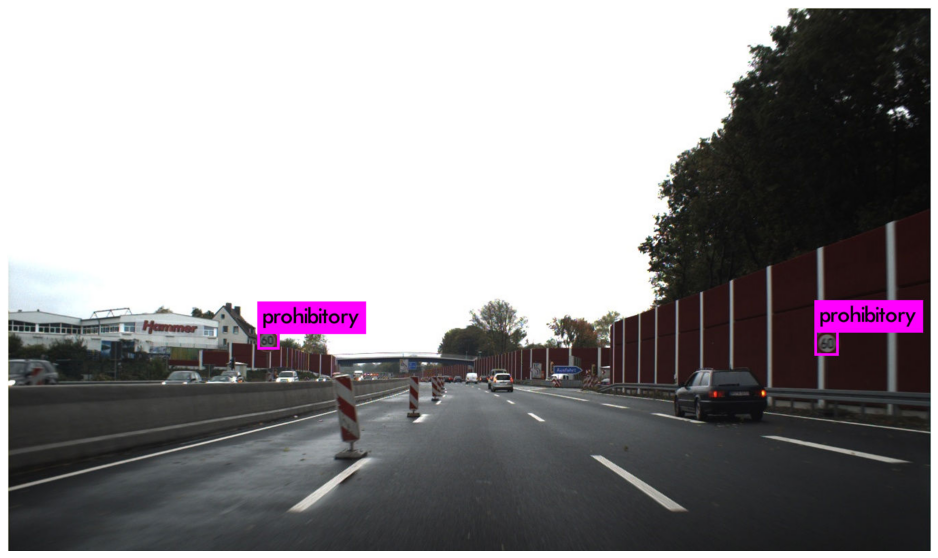

In [20]:
!./darknet detector test obj.data yolov3-4c-1000-max-steps-test.cfg backup/yolov3-4c-4000-max-steps_last.weights traindata/img/00112.jpg -thresh 0.5
imShow("predictions.jpg")

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

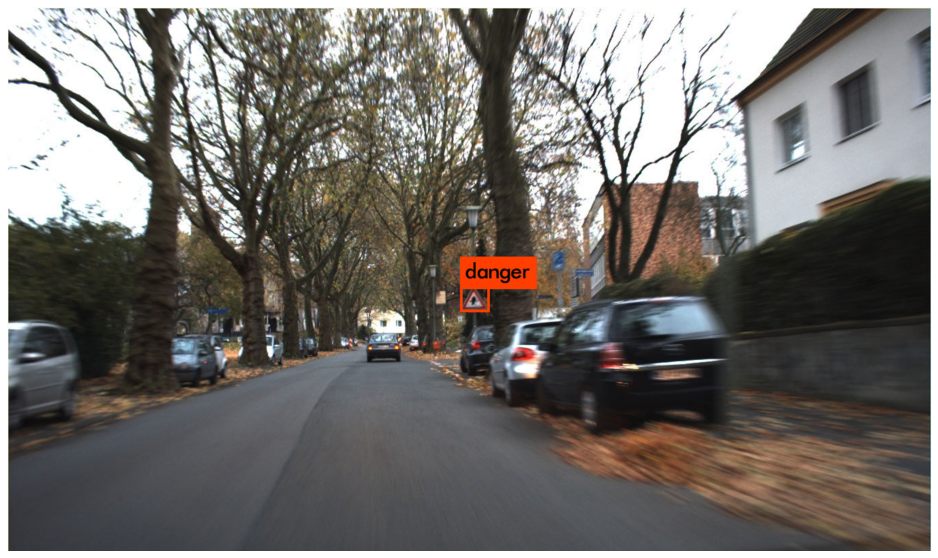

In [18]:
!./darknet detector test obj.data yolov3-4c-1000-max-steps-test.cfg backup/yolov3-4c-4000-max-steps_last.weights traindata/img/00211.jpg -dont_show -thresh 0.5

imShow("predictions.jpg")